In [32]:
import pandas as pd
import numpy as np
import torch

In [33]:
data = pd.read_csv(f"../data/base/sts_ALL.csv")
data

,Unnamed: 0,Rank,Player,Team,Pos,Age,G,GS,passCmp,passAtt,...,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,ID,Year
0,0,1,Priest Holmes*+,KAN,RB,29,14,14,0.0,1.0,...,NaN,371.0,440.7,447.7,405.7,220.0,1,1.0,HolmPr00,2002
1,1,2,Ricky Williams*+,MIA,RB,25,16,16,0.0,0.0,...,NaN,316.0,362.6,372.6,339.1,165.0,2,2.0,WillRi00,2002
2,2,3,LaDainian Tomlinson*,SDG,RB,23,16,16,0.0,0.0,...,NaN,305.0,384.2,391.2,344.7,155.0,3,3.0,TomlLa00,2002
3,3,4,Clinton Portis,DEN,RB,21,16,12,0.0,0.0,...,NaN,283.0,316.2,325.2,299.7,133.0,4,4.0,PortCl00,2002
4,4,5,Marvin Harrison*+,IND,WR,30,16,16,0.0,0.0,...,NaN,241.0,384.2,387.2,312.7,122.0,1,5.0,HarrMa00,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,666,646,Ihmir Smith-Marsette,2TM,WR,23,8,0,0.0,0.0,...,NaN,-1.0,0.4,1.4,-0.1,NaN,252,NaN,SmitIh00,2022
12580,667,647,KaVontae Turpin*,DAL,WR,26,17,0,0.0,0.0,...,NaN,-1.0,-0.4,1.6,-0.9,NaN,254,NaN,TurpKa00,2022
12581,668,648,Taiwan Jones,BUF,NaN,34,16,0,0.0,0.0,...,NaN,-2.0,-2.0,-1.0,-2.0,NaN,173,NaN,JoneTa00,2022
12582,669,649,Chester Rogers,CLE,NaN,28,3,0,0.0,0.0,...,NaN,-2.0,-2.0,-1.0,-2.0,NaN,255,NaN,RogeCh02,2022


Separate data into positional datasets:

In [34]:
qb = data[data.Pos == 'QB']
rb = data[data.Pos == 'RB']
wr = data[data.Pos == 'WR']
te = data[data.Pos == 'TE']

Of the top 10 scorers at each position, calculate how many also were also in the top 10 the year prior.

QBs:

In [35]:
qb_ranks = qb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 10
    dataset = qb_ranks[qb_ranks[yr].notnull()&qb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(10).iterrows():
        if ((row[1].get(key=yr)<=10)&(row[1].get(key=yr+1)<=10)):
            count_ab+=1
count_ab/count_b

0.49

RBs:

In [36]:
rb_ranks = rb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 10
    dataset = rb_ranks[rb_ranks[yr].notnull()&rb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(10).iterrows():
        if ((row[1].get(key=yr)<=10)&(row[1].get(key=yr+1)<=10)):
            count_ab+=1
count_ab/count_b

0.37

WRs:

In [37]:
wr_ranks = wr.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 10
    dataset = wr_ranks[wr_ranks[yr].notnull()&wr_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(10).iterrows():
        if ((row[1].get(key=yr)<=10)&(row[1].get(key=yr+1)<=10)):
            count_ab+=1
count_ab/count_b

0.37

TEs:

In [38]:
te_ranks = te.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 10
    dataset = te_ranks[te_ranks[yr].notnull()&te_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(10).iterrows():
        if ((row[1].get(key=yr)<=10)&(row[1].get(key=yr+1)<=10)):
            count_ab+=1
count_ab/count_b

0.485

Conclusions:<br>
49% of top 10 performing Quarterbacks each year repeated in the top 10 the following year<br>
37% for Running Backs<br>
37% for Wide Receivers<br>
49.5% for Tight Ends<br>

Top 5:

QBs:

In [39]:
qb_ranks = qb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 5
    dataset = qb_ranks[qb_ranks[yr].notnull()&qb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(5).iterrows():
        if ((row[1].get(key=yr)<=5)&(row[1].get(key=yr+1)<=5)):
            count_ab+=1
count_ab/count_b

0.33

RBs:

In [40]:
rb_ranks = rb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 5
    dataset = rb_ranks[rb_ranks[yr].notnull()&rb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(5).iterrows():
        if ((row[1].get(key=yr)<=5)&(row[1].get(key=yr+1)<=5)):
            count_ab+=1
count_ab/count_b

0.31

WRs:

In [41]:
wr_ranks = wr.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 5
    dataset = wr_ranks[wr_ranks[yr].notnull()&wr_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(5).iterrows():
        if ((row[1].get(key=yr)<=5)&(row[1].get(key=yr+1)<=5)):
            count_ab+=1
count_ab/count_b

0.28

TEs:

In [42]:
te_ranks = te.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 5
    dataset = te_ranks[te_ranks[yr].notnull()&te_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(5).iterrows():
        if ((row[1].get(key=yr)<=5)&(row[1].get(key=yr+1)<=5)):
            count_ab+=1
count_ab/count_b

0.48

Top 3:

QBs:

In [43]:
qb_ranks = qb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 3
    dataset = qb_ranks[qb_ranks[yr].notnull()&qb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(3).iterrows():
        if ((row[1].get(key=yr)<=3)&(row[1].get(key=yr+1)<=3)):
            count_ab+=1
count_ab/count_b

0.26666666666666666

RBs:

In [44]:
rb_ranks = rb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 3
    dataset = rb_ranks[rb_ranks[yr].notnull()&rb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(3).iterrows():
        if ((row[1].get(key=yr)<=3)&(row[1].get(key=yr+1)<=3)):
            count_ab+=1
count_ab/count_b

0.2

WRs:

In [45]:
wr_ranks = wr.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 3
    dataset = wr_ranks[wr_ranks[yr].notnull()&wr_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(3).iterrows():
        if ((row[1].get(key=yr)<=3)&(row[1].get(key=yr+1)<=3)):
            count_ab+=1
count_ab/count_b

0.15

TEs:

In [46]:
te_ranks = te.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 3
    dataset = te_ranks[te_ranks[yr].notnull()&te_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(3).iterrows():
        if ((row[1].get(key=yr)<=3)&(row[1].get(key=yr+1)<=3)):
            count_ab+=1
count_ab/count_b

0.4166666666666667

1 Ovr:

QBs:

In [47]:
qb_ranks = qb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 1
    dataset = qb_ranks[qb_ranks[yr].notnull()&qb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(1).iterrows():
        if ((row[1].get(key=yr)<=1)&(row[1].get(key=yr+1)<=1)):
            count_ab+=1
count_ab/count_b

0.1

RBs:

In [48]:
rb_ranks = rb.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 1
    dataset = rb_ranks[rb_ranks[yr].notnull()&rb_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(1).iterrows():
        if ((row[1].get(key=yr)<=1)&(row[1].get(key=yr+1)<=1)):
            count_ab+=1
count_ab/count_b

0.2

WRs:

In [49]:
wr_ranks = wr.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 1
    dataset = wr_ranks[wr_ranks[yr].notnull()&wr_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(1).iterrows():
        if ((row[1].get(key=yr)<=1)&(row[1].get(key=yr+1)<=1)):
            count_ab+=1
count_ab/count_b

0.1

TEs:

In [50]:
te_ranks = te.pivot(index="ID",columns="Year",values="PosRank")
count_ab = 0
count_b = 0
for yr in range(2002,2022,1):
    count_b += 1
    dataset = te_ranks[te_ranks[yr].notnull()&te_ranks[yr+1].notnull()].sort_values(yr)
    for row in dataset.head(1).iterrows():
        if ((row[1].get(key=yr)<=1)&(row[1].get(key=yr+1)<=1)):
            count_ab+=1
count_ab/count_b

0.3

In [51]:
wr_ranks_ages = wr.pivot(index="ID",columns="Age",values="PosRank")

<AxesSubplot:xlabel='Age'>

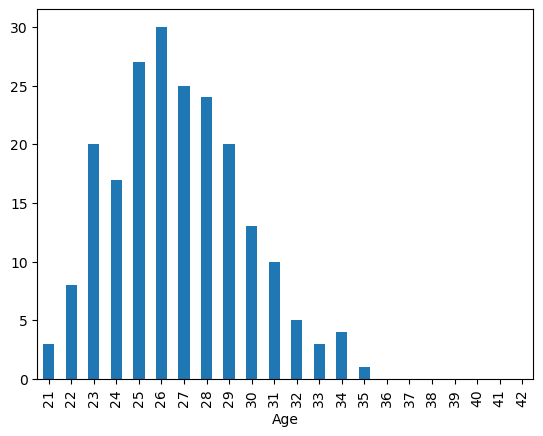

In [52]:
wr_ranks_ages[wr_ranks_ages <= 10].count().plot.bar()

<AxesSubplot:xlabel='Age'>

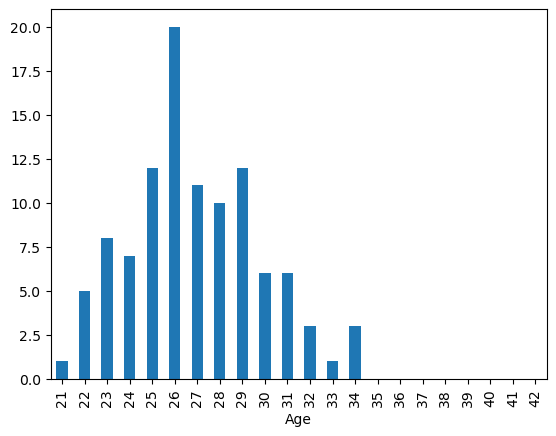

In [53]:
wr_ranks_ages[wr_ranks_ages <= 5].count().plot.bar()

<AxesSubplot:xlabel='Age'>

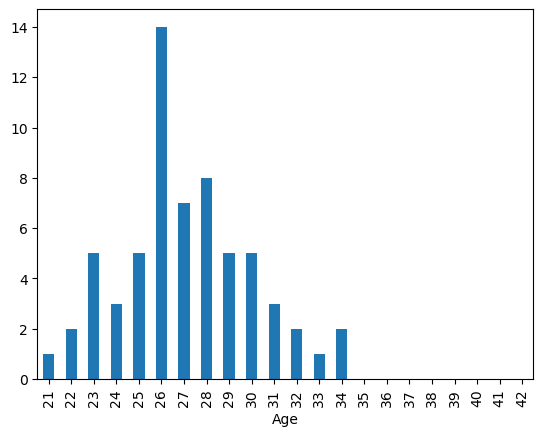

In [54]:
wr_ranks_ages[wr_ranks_ages <= 3].count().plot.bar()

<AxesSubplot:xlabel='Age'>

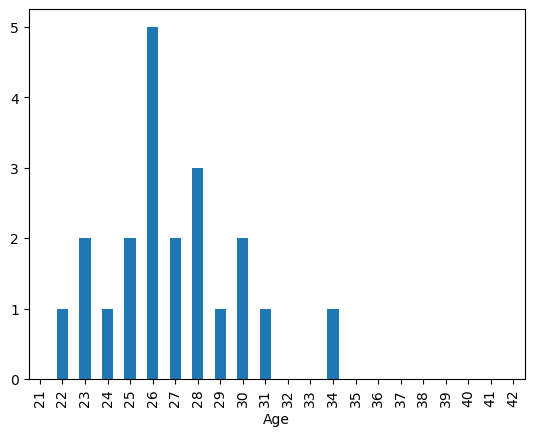

In [55]:
wr_ranks_ages[wr_ranks_ages <= 1].count().plot.bar()

In [56]:
rb_ranks_ages = rb.pivot(index="ID",columns="Age",values="PosRank")

<AxesSubplot:xlabel='Age'>

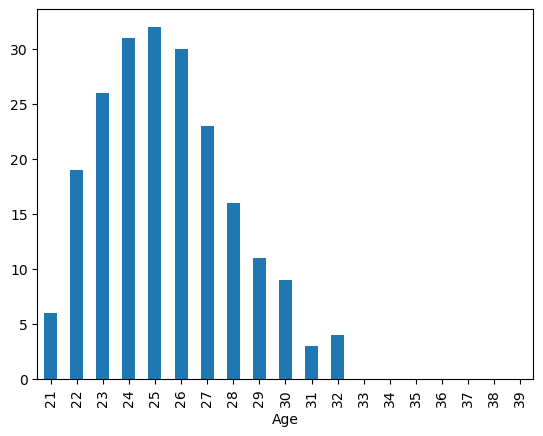

In [57]:
rb_ranks_ages[rb_ranks_ages <= 10].count().plot.bar()

Age
21     5
22     8
23    13
24    18
25    16
26    17
27     9
28     9
29     3
30     4
31     2
32     1
33     0
34     0
35     0
36     0
37     0
38     0
39     0
dtype: int64

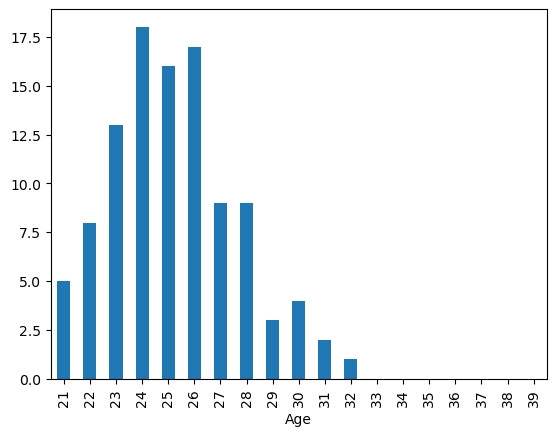

In [58]:
rb_ranks_ages[rb_ranks_ages <= 5].count().plot.bar()
rb_ranks_ages[rb_ranks_ages <= 5].count()

Age
21     2
22     4
23     8
24    10
25    12
26    11
27     5
28     7
29     2
30     2
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
dtype: int64

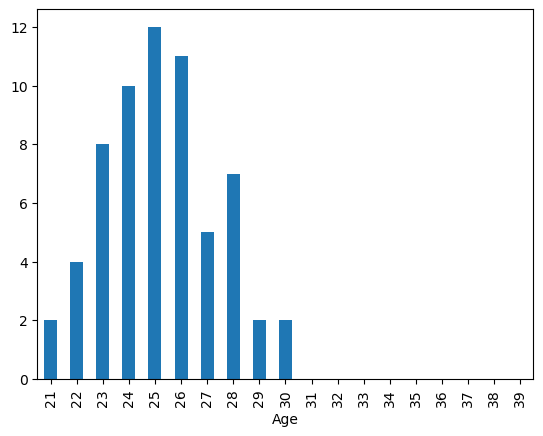

In [59]:
rb_ranks_ages[rb_ranks_ages <= 3].count().plot.bar()
rb_ranks_ages[rb_ranks_ages <= 3].count()

Age
21    0
22    1
23    3
24    5
25    2
26    2
27    4
28    2
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

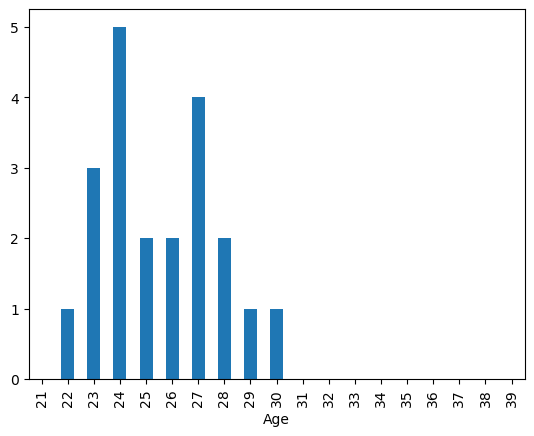

In [60]:
rb_ranks_ages[rb_ranks_ages <= 1].count().plot.bar()
rb_ranks_ages[rb_ranks_ages <= 1].count()